In [1]:
using PyPlot,JLD2,CALCEPH

In [31]:
include("decompose_ttvs.jl")
include("plot_ttvs.jl")
include("plot_likelihood.jl")
include("corner_plot.jl")

corner_planet (generic function with 1 method)

In [61]:
p_31=jldopen("FITS/p3_fit30.0s10.0yrs.jld2");p_mc31 = jldopen("MCMC/p3_mcmc30.0s10.0yrs.jld2");
p_315=jldopen("FITS/p3_fit30.0s15.0yrs.jld2");p_mc315 = jldopen("MCMC/p3_mcmc30.0s15.0yrs.jld2");
# p_32=jldopen("FITS/p3_fit30.0s20.0yrs.jld2");p_mc32 = jldopen("MCMC/p3_mcmc30.0s20.0yrs.jld2");
# p_33=jldopen("FITS/p3_fit30.0s30.0yrs.jld2");p_mc33 = jldopen("MCMC/p3_mcmc30.0s30.0yrs.jld2");
# p_34=jldopen("FITS/p3_fit30.0s40.0yrs.jld2");p_mc34 = jldopen("MCMC/p3_mcmc30.0s40.0yrs.jld2");

Simulated with σ= 30 seconds


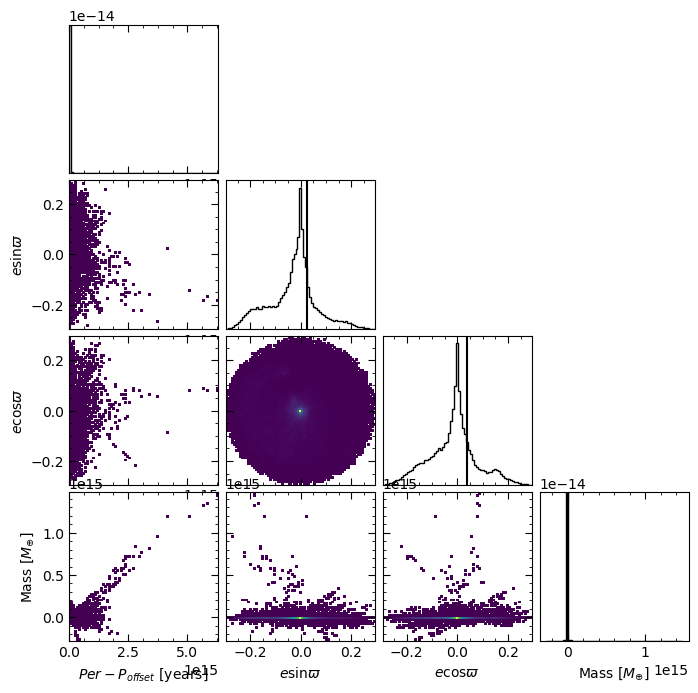

P-off4332.82012875
0.04010139295881334<-ecos & esin->0.026379504975697257


In [60]:
# corner_planet(p_mc31,30,75,"jup")

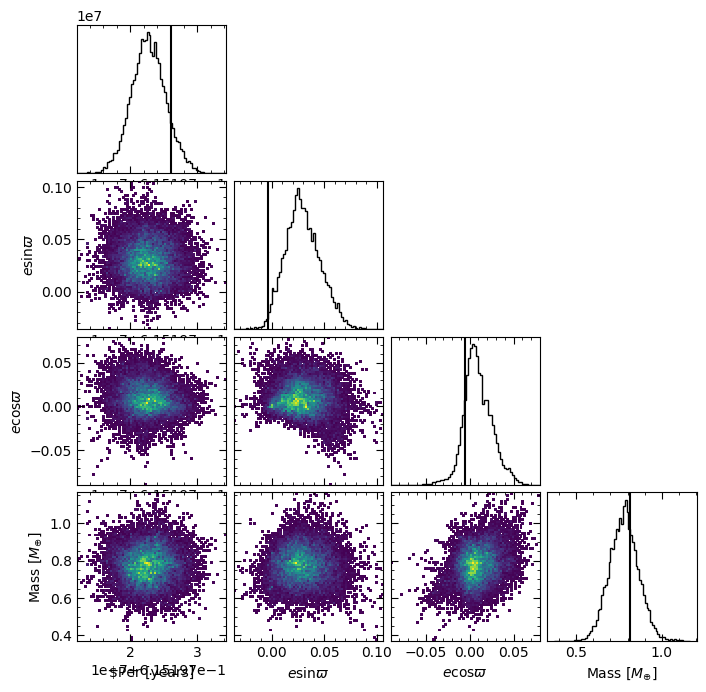

Simulated with σ= 30 seconds
P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [11]:
corner_planet(p_mc32,30,75,"venus")

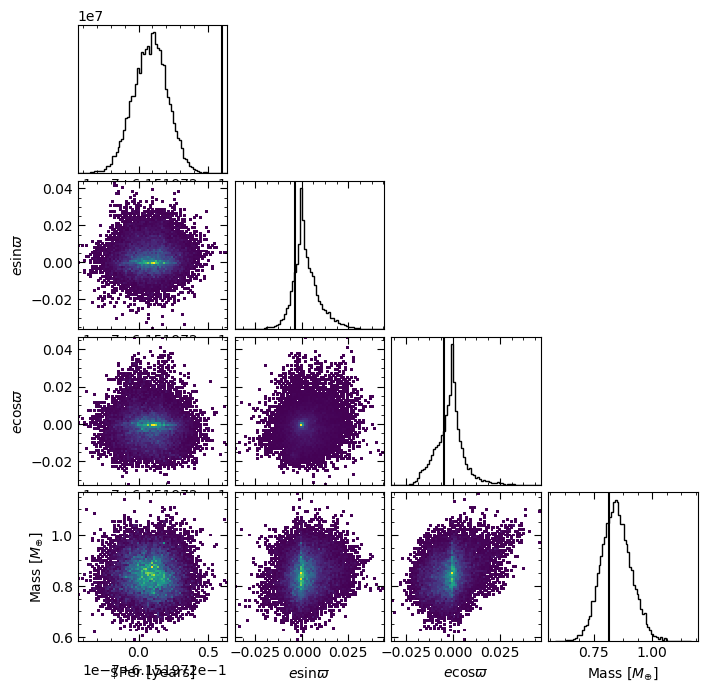

Simulated with σ= 30 seconds
P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [12]:
corner_planet(p_mc33,30,75,"venus")

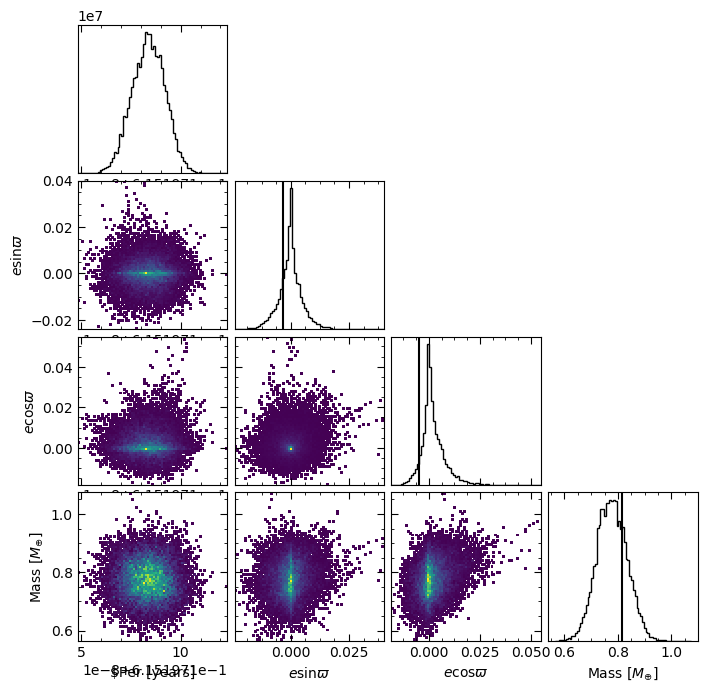

Simulated with σ= 30 seconds
P-off-224.08550274004108
-0.004975858997178902<-ecos & esin->-0.003352734293109698


In [13]:
corner_planet(p_mc34,30,75,"venus")

In [26]:
p_mc31["par_mcmc"][:,:,12]

50×100000 Array{Float64,2}:
 4835.71  4835.71  4835.7   4835.65  …   9749.83         9749.83      
 4835.54  4835.54  4835.54  4835.54         2.30883e13      2.30883e13
 4835.59  4835.59  4835.59  4835.59      6685.64         6685.64      
 4835.65  4835.63  4835.66  4835.66         3.68133e14      3.68133e14
 4835.52  4835.52  4835.52  4835.52      4530.51         4530.51      
 4835.59  4835.59  4835.68  4835.68  …      1.98486e13      1.98486e13
 4835.65  4835.65  4835.67  4835.67      9646.63         9646.63      
 4835.52  4835.52  4835.52  4835.52         4.76514e14      4.76514e14
 4835.54  4835.54  4835.55  4835.55     29956.6         29956.6       
 4835.71  4835.71  4835.68  4835.68         3.01998e14      3.01998e14
 4835.75  4835.75  4835.75  4835.75  …   7286.19         7286.19      
 4835.54  4835.62  4835.62  4835.62      9361.89         9361.89      
 4835.74  4835.74  4835.72  4835.74         1.50588e14      1.50588e14
    ⋮                                ⋱           

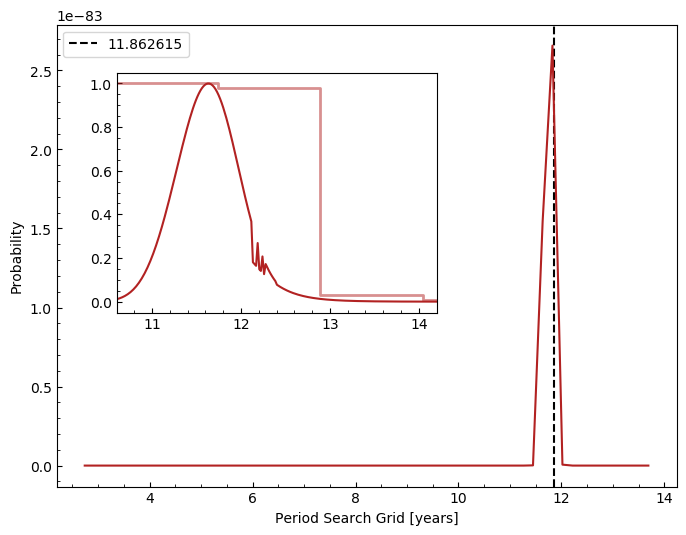

In [64]:
include("plot_likelihood.jl")
plot_likelihood(p_315,p_mc315,false)

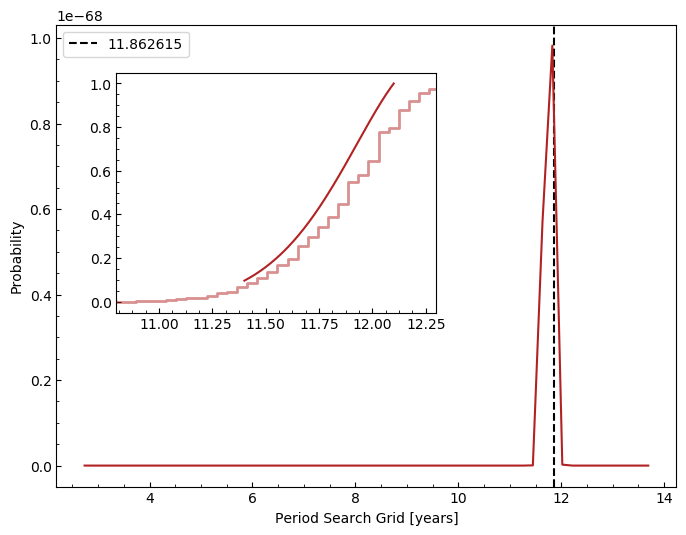

In [74]:
plot_likelihood(p_32,p_mc32,false)

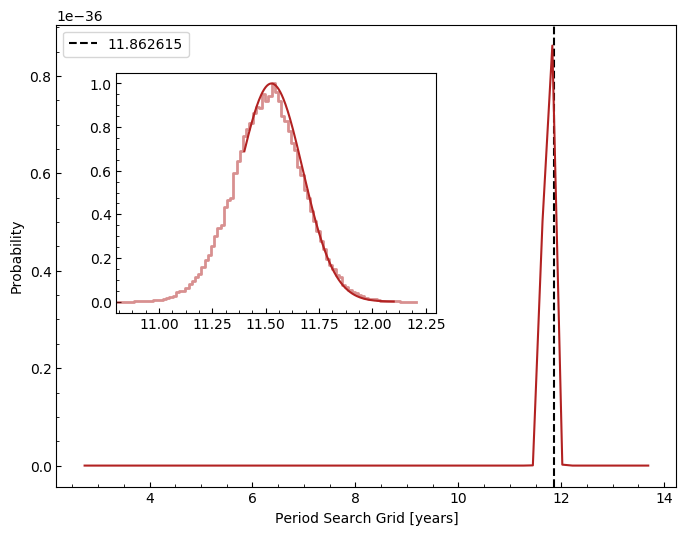

In [61]:
include("plot_likelihood.jl")
plot_likelihood(p_33,p_mc33,false)

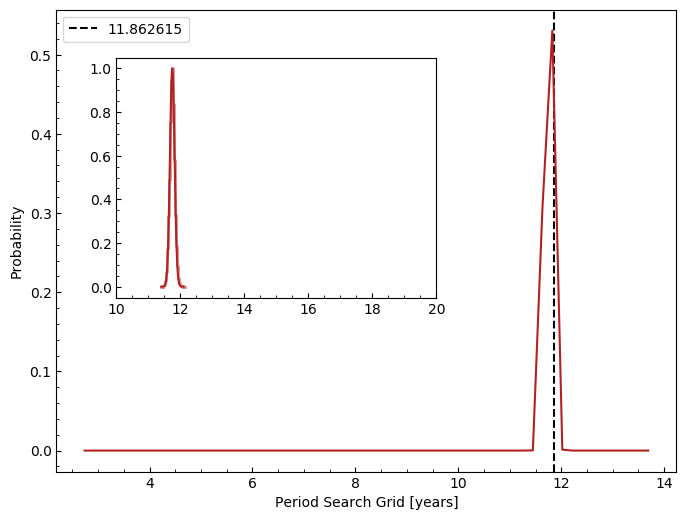

In [58]:
plot_likelihood(p_34,p_mc34,false)

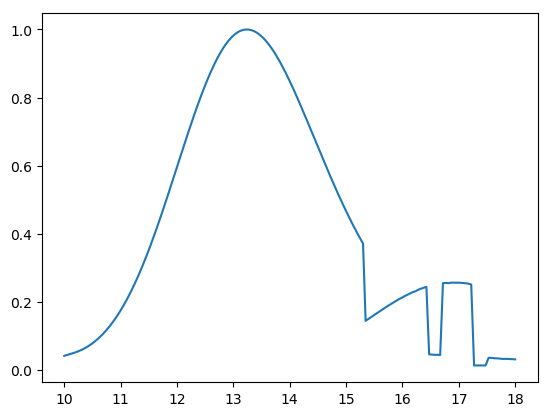

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17bbc7908>

In [15]:
wide = jldopen("FITS/p3_widefit30.0s40.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide["p3in"]),stop=log10(wide["p3out"]),length=wide["np3"])) /365.25
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_31["lprob_p3"])))
xgrid = (10 .^ range(log10(p_31["p3in"]),stop=log10(p_31["p3out"]),length=p_31["np3"])) /365.25
xprob = exp.((p_31["lprob_p3"] .-maximum(p_31["lprob_p3"])))

grid31 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob31 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]

plot(xgrid,xprob)

In [56]:
for i=1:length(xprob); println("Per= ",xgrid[i]," Likelihood= ",xprob[i]," with Prob= ",p_31["lprob_p3"][i]) end

Per= 10.000000000000004 Likelihood= 0.041364528713946865 with Prob= -42.89134614452699
Per= 10.029580683089712 Likelihood= 0.042837397537330124 with Prob= -42.85635836844513
Per= 10.059248867860616 Likelihood= 0.04430475987337475 with Prob= -42.82267774612036
Per= 10.089004813148685 Likelihood= 0.045780817935865616 with Prob= -42.789904682722536
Per= 10.118848778555504 Likelihood= 0.04728490023174588 with Prob= -42.75757885322036
Per= 10.148781024450617 Likelihood= 0.04883908202567263 with Prob= -42.725239010228364
Per= 10.17880181197373 Likelihood= 0.05047228600658568 with Prob= -42.69234547005998
Per= 10.208911403037014 Likelihood= 0.05221140743790304 with Prob= -42.65846885944425
Per= 10.239110060327427 Likelihood= 0.054088172438681026 with Prob= -42.62315432585432
Per= 10.269398047308936 Likelihood= 0.05612712249029145 with Prob= -42.58615070120476
Per= 10.299775628224888 Likelihood= 0.058350727921595506 with Prob= -42.54729803000472
Per= 10.33024306810025 Likelihood= 0.06077502621

Per= 13.716934840309252 Likelihood= 0.9351832390199113 with Prob= -39.773027376102085
Per= 13.75751047055659 Likelihood= 0.9244684741530764 with Prob= -39.78455091393467
Per= 13.798206126289863 Likelihood= 0.913070084691917 with Prob= -39.79695722302238
Per= 13.839022162552686 Likelihood= 0.9010181656274091 with Prob= -39.81024444471734
Per= 13.879958935438864 Likelihood= 0.8883525000432145 with Prob= -39.82440124001837
Per= 13.921016802095604 Likelihood= 0.8751108212897464 with Prob= -39.8394193325107
Per= 13.962196120726533 Likelihood= 0.861332719165834 with Prob= -39.855289000559715
Per= 14.003497250594874 Likelihood= 0.8470543464673245 with Prob= -39.87200500767769
Per= 14.04492055202662 Likelihood= 0.8323199945086786 with Prob= -39.8895528880884
Per= 14.086466386413582 Likelihood= 0.8171695240904577 with Prob= -39.907923294588606
Per= 14.128135116216601 Likelihood= 0.8016415315185574 with Prob= -39.92710832398597
Per= 14.169927104968739 Likelihood= 0.7857817533552331 with Prob= -3

In [57]:
exp(-41.642058348857645+39.706014584768944)

0.14427360260188132

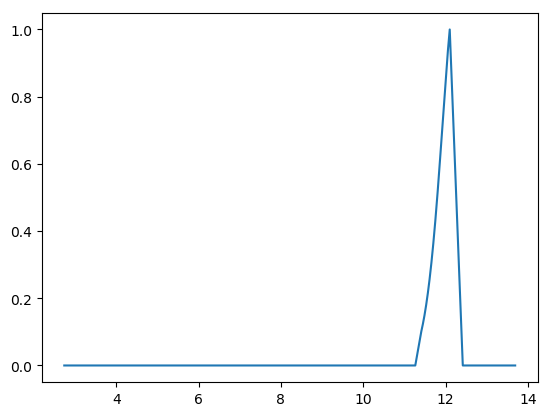

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1675c5f28>

In [178]:
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_32["lprob_p3"])))
xgrid = (10 .^ range(log10(p_32["p3in"]),stop=log10(p_32["p3out"]),length=p_32["np3"])) /365.25
xprob = exp.((p_32["lprob_p3"] .-maximum(p_32["lprob_p3"])))

grid32 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob32 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid32,prob32)

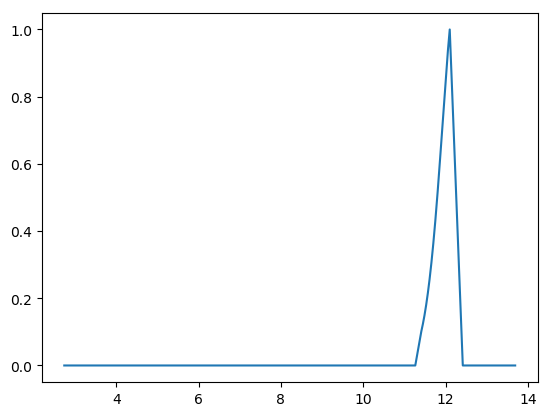

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16a17afd0>

In [179]:
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_33["lprob_p3"])))
xgrid = (10 .^ range(log10(p_33["p3in"]),stop=log10(p_33["p3out"]),length=p_33["np3"])) /365.25
xprob = exp.((p_33["lprob_p3"] .-maximum(p_33["lprob_p3"])))

grid33 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob33 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid33,prob33)

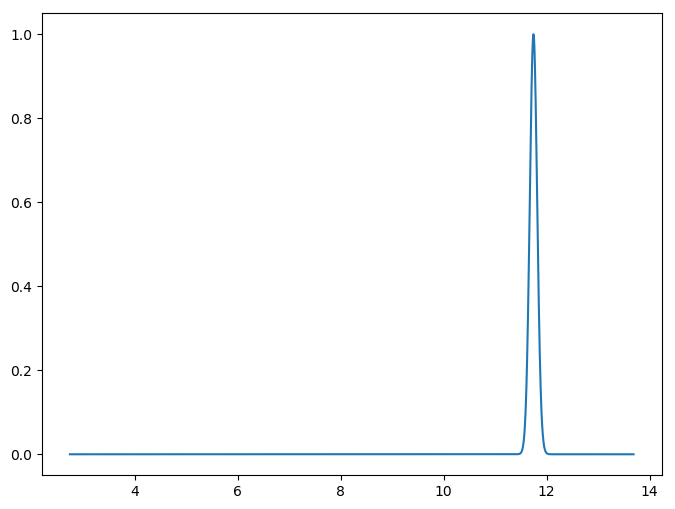

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x169f23978>

In [176]:
wide = jldopen("FITS/p3_widefit30.0s40.0yrs.jld2","r")
grid_wide = (10 .^ range(log10(wide["p3in"]),stop=log10(wide["p3out"]),length=wide["np3"])) /365.25
lprob_wide = exp.((wide["lprob_p3"] .-maximum(p_34["lprob_p3"])))
xgrid = (10 .^ range(log10(p_34["p3in"]),stop=log10(p_34["p3out"]),length=p_34["np3"])) /365.25
xprob = exp.((p_34["lprob_p3"] .-maximum(p_34["lprob_p3"])))
;
fig = plt.figure(figsize=(8,6))
grid34 = [grid_wide[1:end-12];xgrid;grid_wide[end-6:end]]
prob34 = [lprob_wide[1:end-12];xprob;lprob_wide[end-6:end]]
plot(grid34,prob34)
# plot(,xprob)
# plot(,lprob_wide[1:end-12])
# plot(,lprob_wide[end-7:end])

In [186]:
grid_wide[end-12]
# minimum(xgrid)

11.263053391190061

In [116]:
con = [grid_wide;xgrid]
cat = [lprob_wide;xprob]
v = sortperm(con)
con_perm = con[v]
cat_perm = cat[v]

300-element Array{Float64,1}:
 7.568162442633809e-129 
 2.4266294150703526e-127
 3.612584071163413e-138 
 3.3504721283049323e-137
 5.3301012221010373e-138
 2.08999913896937e-137  
 2.296398917962244e-137 
 8.445858493508291e-138 
 3.693136654587856e-138 
 7.7089662774492885e-137
 7.885885213988926e-137 
 3.2921592747265396e-121
 8.227548126878545e-132 
 ⋮                      
 0.9914256848532541     
 0.9942859298483251     
 0.9971447986585075     
 1.0                    
 3.718057159171616e-106 
 1.98407681407841e-111  
 1.7663622768847427e-116
 6.613808908088376e-121 
 1.2597206791710992e-124
 1.0877975522911468e-127
 4.139077556215603e-130 
 3.9872155658773114e-132

In [98]:
grid = zeros(1)
prob = zeros(1)
for val=1:length(con)
    if con[val] > maximum(xgrid)
#         println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
    if con[val] < minimum(xgrid)
        #println(grid_wide[val])
        append!(grid,grid_wide[val])
        append!(prob,lprob_wide[val])
    end
#     if grid_wide[val] > minimum(xgrid) && grid_wide[val]< maximum(xgrid)
#         append!(grid,xgrid[val])
#     end
end

BoundsError: [91mBoundsError: attempt to access 100-element Array{Float64,1} at index [101][39m

In [128]:
minimum(xgrid)

11.399863107460641

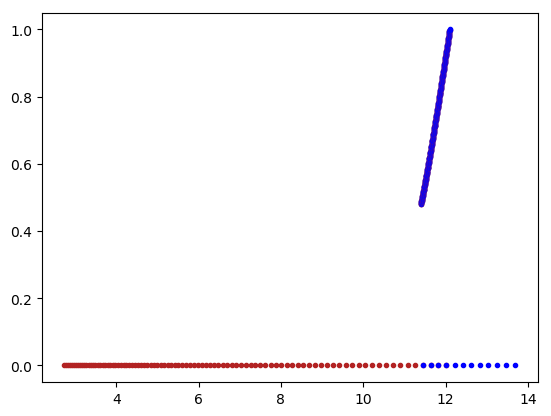

In [126]:
for i=1:length(con_perm)
    if con_perm[i] < maximum(xgrid)
        plot(con_perm[i],cat_perm[i],".",color="firebrick")
    end
    if con_perm[i] > minimum(xgrid)
        plot(con_perm[i],cat_perm[i],".",color="blue")
    end
end

In [161]:
avg(grid_wide[end-12],xgrid[1])
avg(lprob_wide[end-12],xprob[1])

1.0275934718109768e-5

In [158]:
avg(x,y) = (x + y)/2

avg (generic function with 1 method)

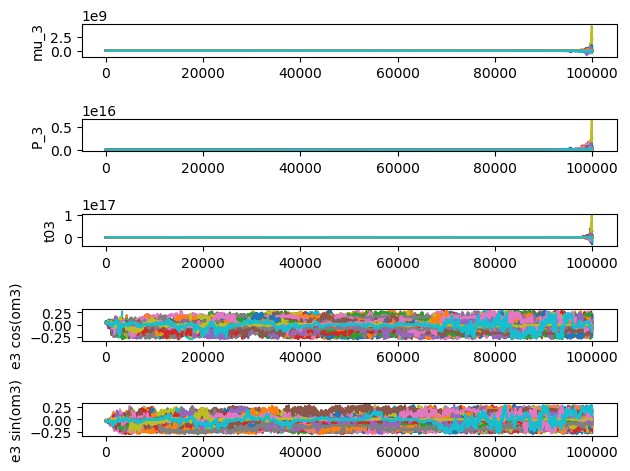

In [65]:
include("plot_emcee.jl")
plot_emcee(p_mc315,"jup")
# xlim(-1,10)

In [27]:
par_31 = p_mc31["par_mcmc"]
nwalkers = p_mc31["nwalkers"]
nsteps = p_mc31["nsteps"]
accept = p_mc31["accept"]
iburn = p_mc31["iburn"]
m = zeros(0)
for j=1:nwalkers 
    append!(m,mean(par_31[j,1:nsteps,12]))
end
m

50-element Array{Float64,1}:
  7623.026885055661       
     7.07259488024656e12  
  8471.23152439375        
     1.5917336000904328e13
  6428.55008220318        
     2.3248697705389146e12
  6301.173692957664       
     7.971965421426739e12 
 18008.940576974495       
     9.478706384201164e12 
  9714.991278993342       
  7109.599255862606       
     6.939276461654673e12 
     ⋮                    
     7.587799878320808e12 
  6333.071582976281       
     4.965004832709909e12 
     8.64697734432209e12  
 18671.389959012766       
 15422.488328775295       
     7.806413062929541e12 
     3.9129677810826205e7 
     2.59361852491533e12  
 10736.812675915351       
  8391.772775288155       
     5.929595016427164e12 

In [32]:
minimum(m)

365.2561427755755

In [38]:
minimum(vec(par_31[1:end,1:nsteps,7]))

365.2546224716408

In [42]:
# m_31=jldopen("FITS/moon_fit30.0s10.0yrs.jld2");m_mc31 = jldopen("MCMC/moon_mcmc30.0s10.0yrs.jld2");
m_32=jldopen("FITS/moon_fit60.0s20.0yrs.jld2");m_mc32 = jldopen("MCMC/moon_mcmc60.0s20.0yrs.jld2");
m_33=jldopen("FITS/moon_fit60.0s30.0yrs.jld2");m_mc33 = jldopen("MCMC/moon_mcmc60.0s30.0yrs.jld2");
m_34=jldopen("FITS/moon_fit60.0s40.0yrs.jld2");m_mc34 = jldopen("MCMC/moon_mcmc60.0s40.0yrs.jld2");

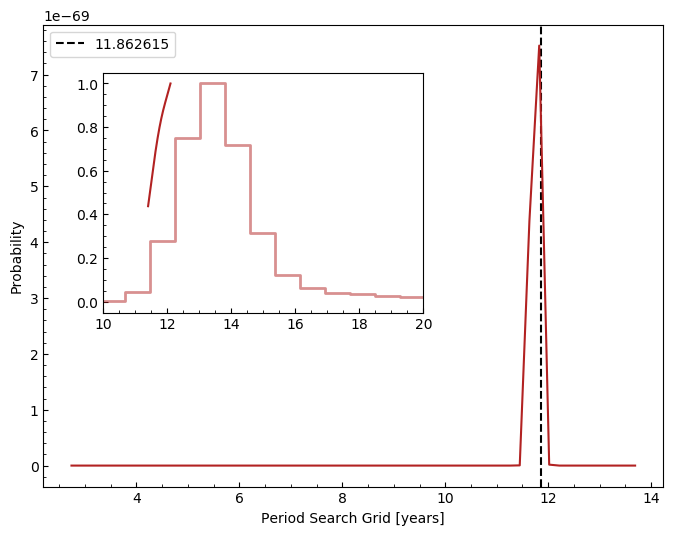

In [49]:
include("plot_likelihood.jl")
plot_likelihood(m_32,m_mc32,false)

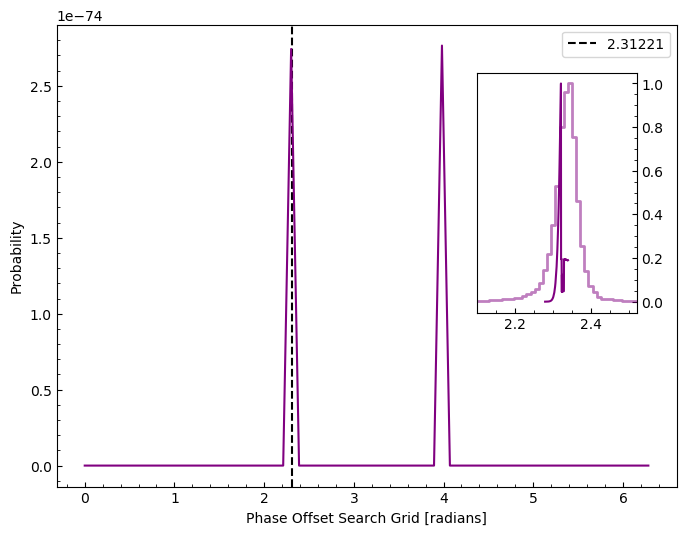

In [70]:
include("plot_likelihood.jl")
plot_likelihood(m_32,m_mc32,true)

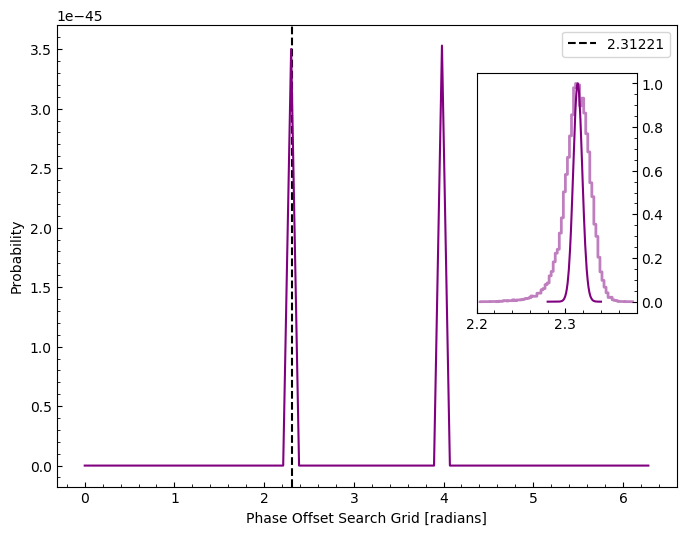

In [72]:
include("plot_likelihood.jl")
plot_likelihood(m_33,m_mc33,true)

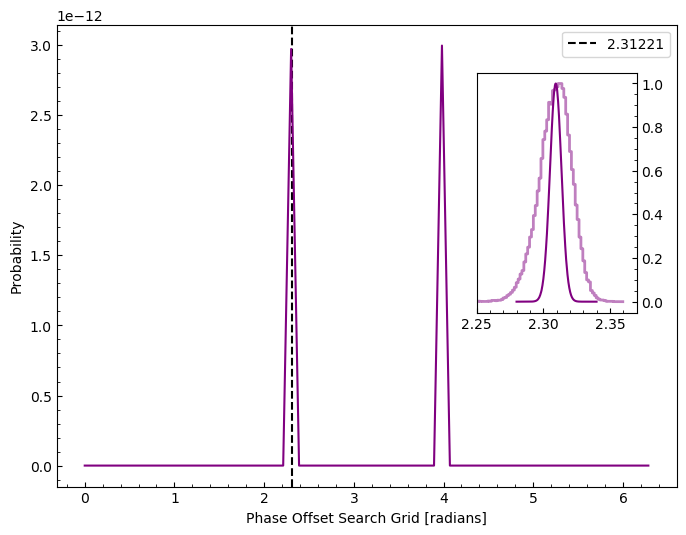

In [64]:
include("plot_likelihood.jl")
plot_likelihood(m_34,m_mc34,true)

In [38]:
p_mc31["par_mcmc"]
# for i=1:length(p_mc31["lprob_mcmc"])
#     if p_mc31["lprob_mcmc"][i]<0
#         print(p_mc31["par_mcmc"][i,:,:])
#     end
# end

50×100000×16 Array{Float64,3}:
[:, :, 1] =
 1.8351e-6   1.8351e-6   1.87043e-6  …  2.40442e-6  2.40442e-6  2.40442e-6
 2.14649e-6  2.14649e-6  2.14649e-6     3.00152e-6  3.00152e-6  3.00152e-6
 2.14067e-6  2.14067e-6  2.14067e-6     2.92991e-6  2.92991e-6  2.92991e-6
 1.92474e-6  1.93608e-6  1.95052e-6     1.98814e-6  1.98814e-6  1.98814e-6
 2.14205e-6  2.14205e-6  2.14205e-6     2.21707e-6  2.21707e-6  2.21707e-6
 2.24205e-6  2.24205e-6  2.15966e-6  …  2.10425e-6  2.10425e-6  2.10425e-6
 2.00612e-6  2.00612e-6  1.98823e-6     2.44606e-6  2.44606e-6  2.44606e-6
 2.01786e-6  2.01786e-6  2.01786e-6     1.022e-6    1.02525e-6  1.02525e-6
 2.15076e-6  2.15076e-6  2.14457e-6     2.71967e-6  2.71967e-6  2.71967e-6
 1.98433e-6  1.98772e-6  2.01063e-6     4.12721e-6  4.12721e-6  4.12721e-6
 2.01236e-6  2.01236e-6  2.01236e-6  …  2.64784e-6  2.64784e-6  2.64784e-6
 1.92651e-6  1.95008e-6  1.95008e-6     2.40614e-6  2.40614e-6  2.40614e-6
 2.11751e-6  2.11751e-6  2.12588e-6     3.86599e-6  3.865

In [ ]:
p_31["lprob"]